In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
import math

In [2]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual.txt')
data=data.iloc[:,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)


data

,x_w,y_w,th_w,x_1,y_1,th_1,hmm_1,hmm_2,real_cuant,x,y,th,error_w,error_th_w,error_dual,error_th_dual
0,0.315471,0.640810,-0.779875,0.374526,0.368126,-0.775972,3.0,14.0,3.0,0.327302,0.652749,-0.706864,0.016808,7.301094e-02,0.288514,0.069108
1,0.315342,0.633849,-0.758249,0.374274,0.361169,-0.754346,3.0,14.0,3.0,0.327461,0.646861,-0.688319,0.017781,6.992956e-02,0.289501,0.066027
2,0.315204,0.626807,-0.736169,0.374008,0.354131,-0.732267,3.0,14.0,3.0,0.327634,0.640950,-0.669578,0.018829,6.659118e-02,0.290544,0.062689
3,0.315134,0.623322,-0.725181,0.373913,0.350646,-0.721278,3.0,14.0,3.0,0.327782,0.635138,-0.650907,0.017309,7.427349e-02,0.288208,0.070371
4,0.314971,0.616434,-0.703221,0.373626,0.343762,-0.699318,3.0,14.0,3.0,0.327956,0.629380,-0.632296,0.018336,7.092437e-02,0.289246,0.067022
5,0.314823,0.609640,-0.681328,0.373356,0.336972,-0.677426,3.0,0.0,3.0,0.328115,0.623710,-0.613680,0.019356,6.764814e-02,0.290285,0.063746
6,0.314651,0.602960,-0.659502,0.373064,0.330296,-0.655599,3.0,0.0,3.0,0.328269,0.618104,-0.595187,0.020366,6.431476e-02,0.291272,0.060412
7,0.314490,0.596353,-0.637885,0.372786,0.323693,-0.633983,0.0,0.0,3.0,0.328419,0.612554,-0.576845,0.021365,6.104059e-02,0.292248,0.057138
8,0.314427,0.593075,-0.627090,0.372700,0.320415,-0.623187,0.0,0.0,3.0,0.328612,0.607055,-0.558499,0.019917,6.859013e-02,0.290011,0.064688
9,0.314286,0.586603,-0.605499,0.372445,0.313947,-0.601597,0.0,0.0,3.0,0.328788,0.601644,-0.540127,0.020893,6.537196e-02,0.290991,0.061469


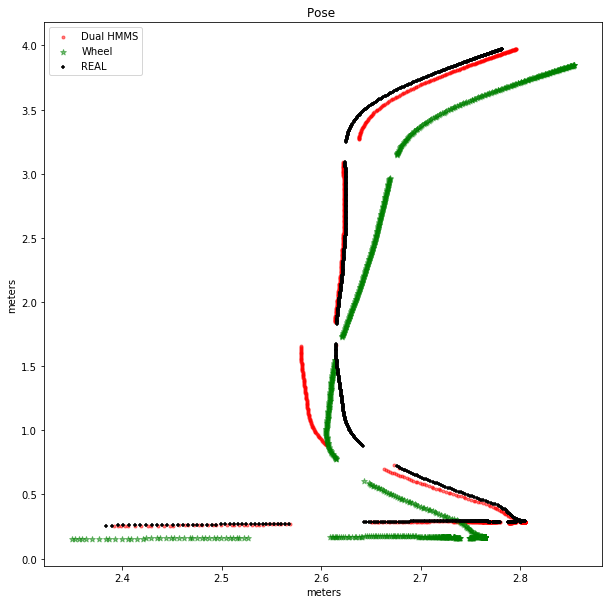

In [3]:
data=pd.read_csv('dataset_candidatura_wr/odometry_dual.txt')
data=data.iloc[::,:-1]
cols=['x_w','y_w','th_w','x_1','y_1','th_1','hmm_1','hmm_2','real_cuant','x','y','th']
data.columns=cols
data['error_w']=np.linalg.norm(data[['x_w','y_w']].values-data[['x','y']].values ,axis=1)
data['error_th_w']=np.linalg.norm(data[['th_w']].values-data[['th']].values ,axis=1)
data['error_dual']=np.linalg.norm(data[['x_1','y_1']].values-data[['x','y']].values ,axis=1)
data['error_th_dual']=np.linalg.norm(data[['th_1']].values-data[['th']].values ,axis=1)



start=700
end=1000

data_s=data
data_s=data.iloc[start:start+end]
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')
ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c='red',alpha=.5,label= 'Dual HMMS')

ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.5,label= 'Wheel')



ax1.scatter(x= data_s.x, y=data_s.y,marker='+',s=20,c='black',label= "REAL")

plt.legend()



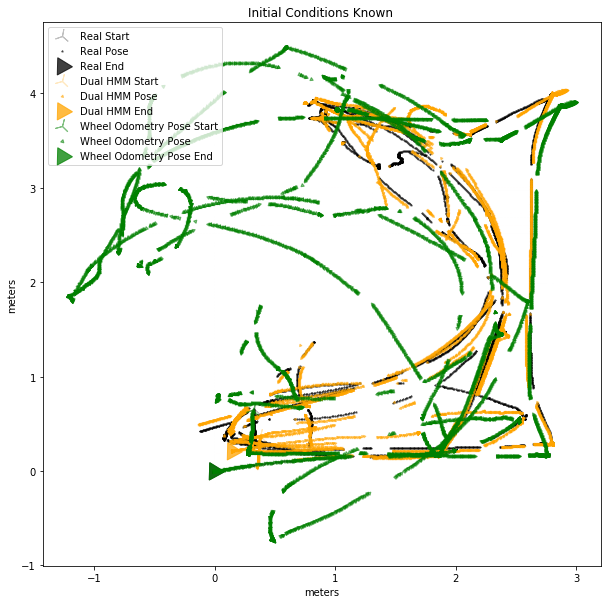

In [11]:
def plot_run_poses(data,start=0,length=500, title=''):
    
    data_s=data.iloc[start:start+length]
    #data_s=data
    fig = plt.figure(figsize=(10,10))
    

    path = data_s[['x','y','th']].values
    
   
    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('meters')
    
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='black', linestyle='None',alpha=0.25, label='Real Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=2,c='black', linestyle='None',alpha=0.5, label= 'Real Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='black', linestyle='None',alpha=0.75, label='Real End')
    
    
    path = data_s[['x_1','y_1','th_1']].values
    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='orange', linestyle='None',alpha=0.25, label='Dual HMM Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=3,c='orange', linestyle='None',alpha=0.5, label= 'Dual HMM Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='orange', linestyle='None',alpha=0.75, label='Dual HMM End')
    path = data_s[['x_w','y_w','th_w']].values

    for i,c  in enumerate( path):
        ang=c[2]*180/np.pi
        if i== 0:
            ax1.plot(c[0], c[1], marker=(3, 2,ang-90  ), markersize=15,c='green', linestyle='None',alpha=0.5, label='Wheel Odometry Pose Start')
        ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=4,c='green', linestyle='None',alpha=0.5, label= 'Wheel Odometry Pose')
    ax1.plot(c[0], c[1], marker=(3, 1,ang-90  ), markersize=20,c='green', linestyle='None',alpha=0.75, label='Wheel Odometry Pose End')
    plt.legend()
    

plot_run_poses(data,0,len(data)-300,title="Initial Conditions Known ")

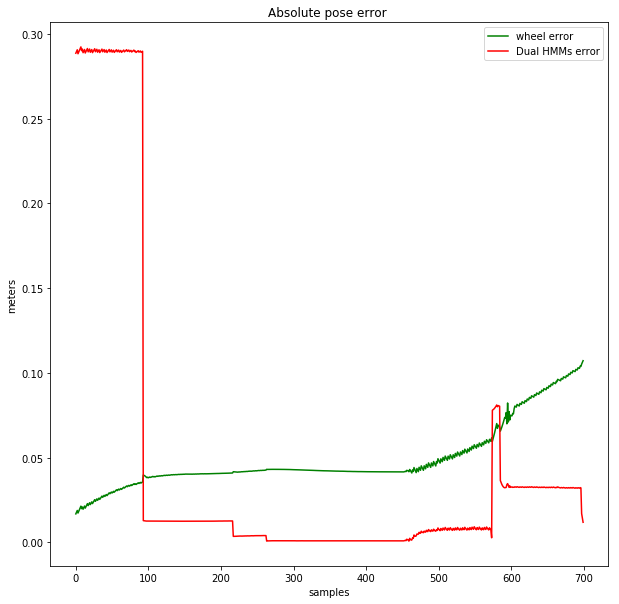

In [32]:
def plot_error (data,start=0,length=500,title=''):
    data_s=data.iloc[start:start+length]
    fig = plt.figure(figsize=(10,10))
    plt.plot(data_s.error_w,c='green',label='wheel error')
    plt.plot(data_s.error_dual,c='red',label='Dual HMMs error')


    ax1 = fig.add_subplot(111)
    ax1.set_title( title)
    ax1.set_ylabel('meters')
    ax1.set_xlabel('samples')
    ax1.legend()
plot_error(data,0,700,title="Absolute pose error ")

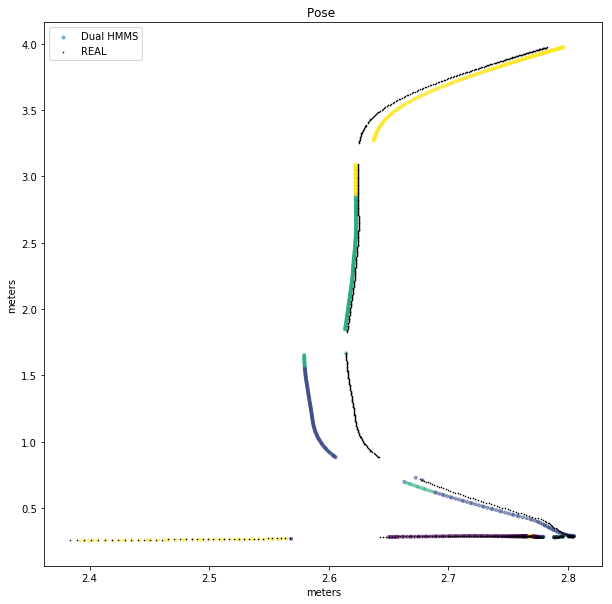

In [4]:
#data_s=data.iloc[start:start+400]
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.set_title( "Pose ")
ax1.set_ylabel('meters')
ax1.set_xlabel('meters')

ax1.scatter(x= data_s.x_1, y=data_s.y_1,marker='.',c=data_s.hmm_1,alpha=.5,label= 'Dual HMMS')
#ax1.scatter(x= data_s.x_w, y=data_s.y_w,marker='*',c='green',alpha=.15,label= 'Wheel')
ax1.scatter(x= data_s.x, y=data_s.y,marker='*',s=.5,c='black',label= "REAL")
plt.legend()



/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


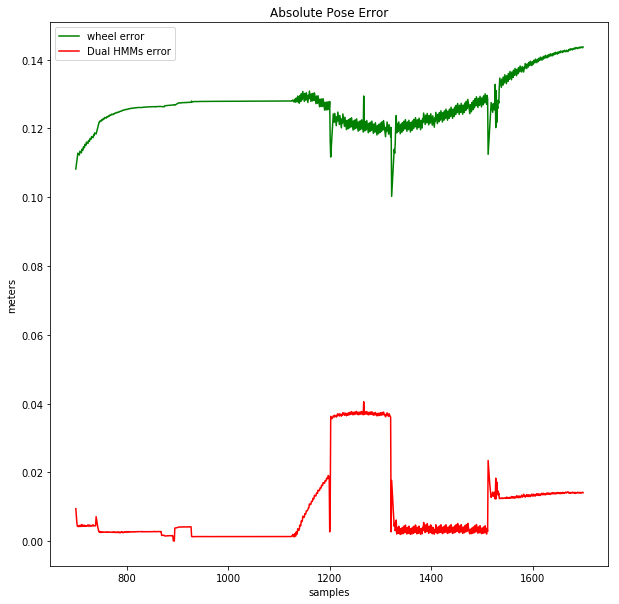

In [5]:

fig = plt.figure(figsize=(10,10))
plt.plot(data_s.error_w,c='green',label='wheel error')
plt.plot(data_s.error_dual,c='red',label='Dual HMMs error')


ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute Pose Error")
ax1.set_ylabel('meters')
ax1.set_xlabel('time steps')

ax1.legend()

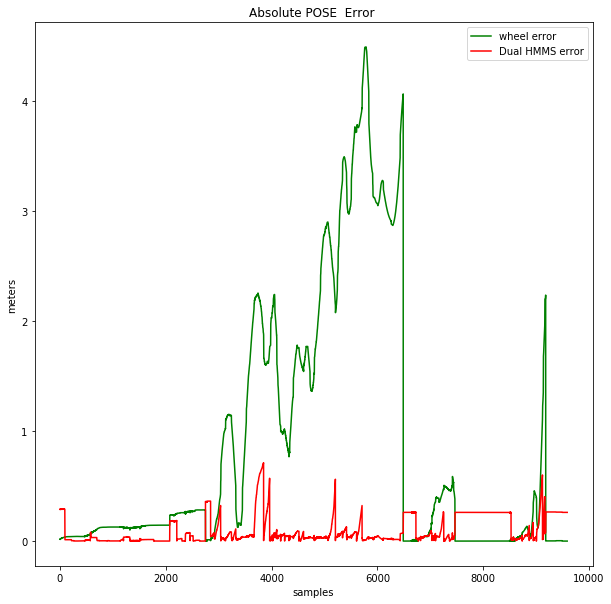

In [6]:
fig = plt.figure(figsize=(10,10))
plt.plot(data.error_w,c='green',label='wheel error')
plt.plot(data.error_dual,c='red',label='Dual HMMS error')


ax1 = fig.add_subplot(111)
ax1.set_title( "Absolute POSE  Error ")
ax1.set_ylabel('meters')
ax1.set_xlabel('samples')

ax1.legend()

In [7]:

lecs=[2,2,2,3,4,5,5]
np.unique(lecs)[-2:]

array([4, 5])

In [8]:
trans=np.load('trans.npy')


In [9]:
ccxyth=np.load('ccxyth.npy')
A=np.load('A.npy')
N=len(A)
N
A[np.where(A==0)]=5
A[np.where(A<=0.001)]=5
A[np.where(A==5)]=0
np.save('A.npy',A)

In [10]:
save= False
trans=np.zeros((32, 32, 3))
for i in range (N):
    for j in range (N):
        if (A[i,j]!=0) and (i!=j) :
            
            trans[i,j,:]=   ccxyth[j,:]+ (.5 * (ccxyth[i,:]-ccxyth[j,:]))
            
    

In [11]:
if save:
    np.save('trans.npy',trans)

In [12]:
trans[3,9,:]

array([0., 0., 0.])

In [13]:

ccxyth[3,:]

array([ 2.39016975,  0.62209101, -1.99099858])

In [14]:
def path_to_xyth(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    estimated['thcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,2])                                
    return (estimated)
    

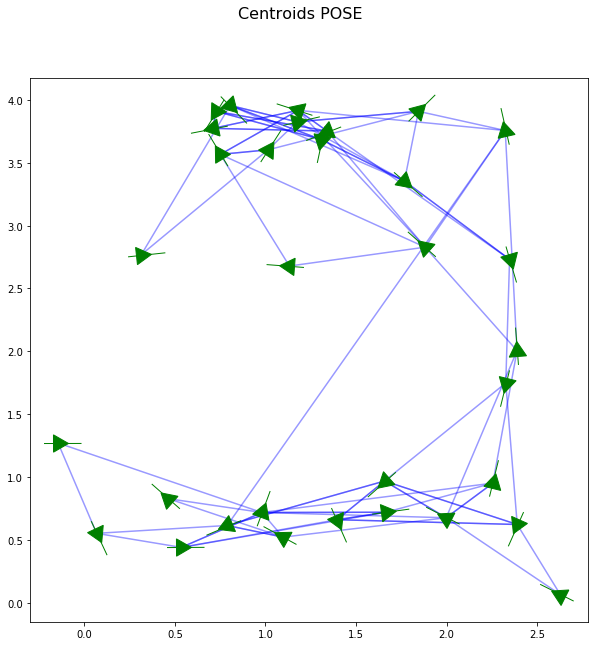

In [15]:
cc=ccxyth



x=np.linspace(0,.4)
fig = plt.figure(figsize=(10,10))
fig.suptitle('Centroids POSE', fontsize=16)
euclD=np.zeros((N,N,1))
ss= np.arange(len(A))
for s1 in ss:
    for s2 in ss:
        if (s1!=s2)and (A[s1,s2]!=0):# and (np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])<1)   :#and(s1==s or s2==s)
            xvalues=[ccxyth[s1,0],ccxyth[s2,0]]
            yvalues=[ccxyth[s1,1],ccxyth[s2,1]]
            euclD[s1,s2]=np.linalg.norm(ccxyth[s1,:2]-ccxyth[s2,:2])

            ax1 = fig.add_subplot(111)

            plt.plot(xvalues,yvalues ,alpha=.4 ,c='b' )
         
            scatter= ax1.scatter(x= ccxyth[s1,0], y=ccxyth[s1,1],c='b' ,marker='.',s=100)
            scatter= ax1.scatter(x= ccxyth[s2,0], y=ccxyth[s2,1],c='b' ,marker='.',s=100)
            #scatter= ax1.scatter(x= trans[s1,s2,0], y=trans[s1,s2,1],c='b' ,marker='|',s=140)
for c in cc:
        ang=c[2]*180/math.pi
        plt.plot(c[0], c[1], marker=(3, 1,ang - 90 ), markersize=20,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang- 90), markersize=50,c='green', linestyle='--')




In [16]:

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang + 90 ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

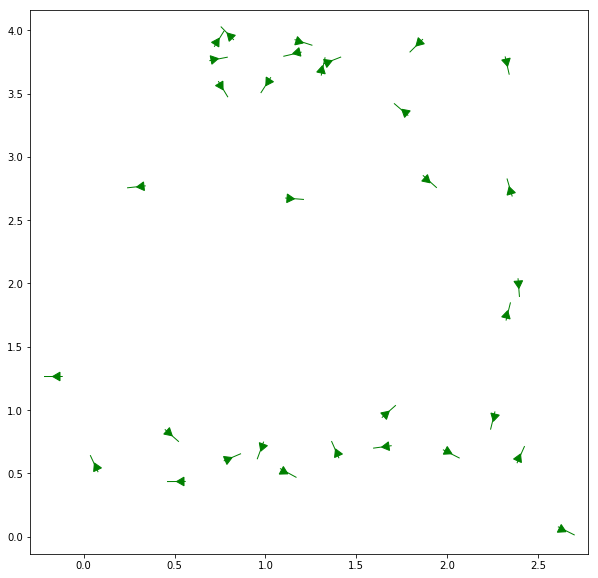

In [17]:
fig=plt.figure(figsize=(10,10))
plot_cc_arrow(cc)


In [18]:
np.where(euclD > 2)

(array([11]), array([28]), array([0]))

In [19]:
euclD[9,14],euclD[14,9]

(array([0.]), array([0.]))

In [20]:
A[14,9]=0

In [21]:
#np.save('A.npy',A)

In [22]:
import rospy
from sensor_msgs.msg import LaserScan
import numpy as np
from joblib import dump, load
clf=load('aff_prop_class.joblib_2')


class Laser():
    u"""Class that handles laser information"""

    def __init__(self):
        # Register the _laser_cb method as a callback to the laser scan topic events
        self._laser_sub = rospy.Subscriber ('/hsrb/base_scan',
                                           LaserScan, self._laser_cb)
        self._scan_data = None

    def _laser_cb (self, msg):
        # Laser scan callback function
        self._scan_data = msg

    def get_data(self):
        u"""Function to get the laser value"""
        return self._scan_data
rospy.init_node('base_and_sensor')


Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


ROSInitException: Failed to initialize time. Please check logs for additional details

In [ ]:

laser = Laser()


In [ ]:
lec=np.asarray(laser.get_data().ranges)
lec=np.clip(lec,0,5    )
Vk_aff= (int)( clf.predict(lec.reshape(1,-1)))
Vk_aff  
    

In [ ]:

B2=np.load('B2.npy')
A2=np.load('A2.npy')


In [ ]:
B2[:,Vk_aff]

In [ ]:

lec=np.asarray(laser.get_data().ranges)
lec=np.clip(lec,0,5    )
Vk_aff= (int)( clf.predict(lec.reshape(1,-1)))
Vk_aff

In [ ]:
obs_2=np.array([21, 21, 11, 11, 31, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 73, 123])

In [ ]:
obs_2

In [ ]:
from utils_hmm import  viterbi , HMM , forw_alg

In [ ]:
A=np.load('A.npy')

In [ ]:
B2=np.load('B2.npy')
PI2=np.load('PI2.npy')

In [ ]:
Modelo2=HMM(A,B2,PI2)

In [ ]:
viterbi(obs_2[-1:],Modelo2,Modelo2.PI)

In [ ]:
forw_alg(obs_2[:1],Modelo2)

In [ ]:
B2[11,134:137]